# Adam

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[8794]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 134,
        253, 255, 253, 253, 213,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

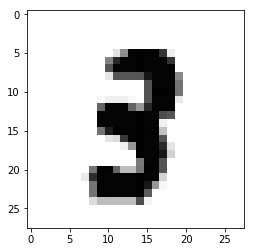

In [7]:
plt.imshow(x_train[8794], cmap="Greys")

In [8]:
y_train[8794]

3

In [9]:
x_train[8794].shape

(28, 28)

In [10]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [11]:
x_train[8794].shape

(784,)

In [12]:
from keras.utils import np_utils

In [13]:
y_train = np_utils.to_categorical(y_train, 10)

In [14]:
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
y_train[8794]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import  SGD

In [17]:
model_1 = Sequential()

In [18]:
model_1.add(Dense(4, input_dim=784))
model_1.add(Activation("sigmoid"))
model_1.add(Dense(2))
model_1.add(Activation("sigmoid"))
model_1.add(Dense(10))
model_1.add(Activation("softmax"))
model_1.compile(loss = 'mse', 
              optimizer = SGD(lr=0.087),
              metrics = ["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_1_20 = model_1.fit(x_train, y_train, 
          batch_size=100, 
          epochs=20, 
          verbose=1, 
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0901 - acc: 0.1275 - val_loss: 0.0898 - val_acc: 0.1402
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0896 - acc: 0.1485 - val_loss: 0.0894 - val_acc: 0.1453
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0893 - acc: 0.1529 - val_loss: 0.0892 - val_acc: 0.1503
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0891 - acc: 0.1489 - val_loss: 0.0890 - val_acc: 0.1247
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0889 - acc: 0.1256 - val_loss: 0.0888 - val_acc: 0.1178
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0887 - acc: 0.1173 - val_loss: 0.0886 - val_acc: 0.1125
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0

In [21]:
from ipywidgets import interact_manual

In [22]:
predict = model_1.predict_classes(x_test)

In [23]:
model_1.predict(x_test)[0]

array([0.0573738 , 0.07575384, 0.0574095 , 0.09768799, 0.05213743,
       0.0769859 , 0.04688735, 0.43402034, 0.05471536, 0.04702845],
      dtype=float32)

In [24]:
def test(num):
    plt.imshow(x_test[num].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict[num])

In [25]:
interact_manual(test, num =(0,9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.test(num)>

In [26]:
score = model_1.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 33us/step


In [27]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.08523958916664123
測試資料正確率: 0.1166


In [28]:
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

In [29]:
x_train_1.max()

1.0

In [30]:
x_train_2 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_2 = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [31]:
x_train_2.max()

1.0

In [32]:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(2))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'mse', 
              optimizer = SGD(lr=0.05),
              metrics = ["accuracy"])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_2_20 = model_2.fit(x_train_1, y_train,
                        batch_size = 100,
                        epochs = 20,
                        verbose = 1,
                        validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0904 - acc: 0.0993 - val_loss: 0.0903 - val_acc: 0.1032
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0903 - acc: 0.0993 - val_loss: 0.0902 - val_acc: 0.1032
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0902 - acc: 0.0993 - val_loss: 0.0902 - val_acc: 0.1032
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0902 - acc: 0.0993 - val_loss: 0.0901 - val_acc: 0.1032
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0901 - acc: 0.0993 - val_loss: 0.0901 - val_acc: 0.1032
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0901 - acc: 0.0993 - val_loss: 0.0900 - val_acc: 0.1032
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0900 - acc: 0.0992 - val_loss: 0.0900 - val_acc

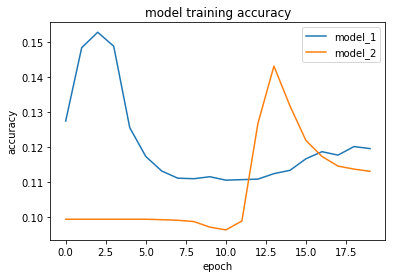

In [35]:
plt.plot(model_1_20.history["acc"])
plt.plot(model_2_20.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")
plt.show()

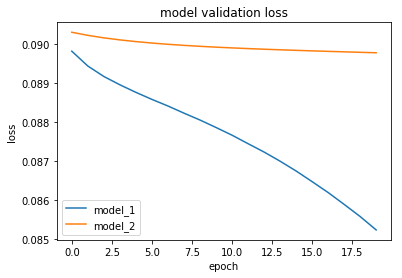

In [37]:
plt.plot(model_1_20.history["val_loss"])
plt.plot(model_2_20.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")
plt.show()